# Clasificador KNN
## desarrollo del algoritmo
### usando base de datos breast-cancer-wisconsin
*basado en distancia euclídia*

In [1]:
import numpy as np #para trabajar con los datos
import matplotlib.pyplot as plt #para realizar graficas
from matplotlib import style #para darle estilos a las gráficas
import warnings
from math import sqrt
from collections import Counter #para establecer un sistema de votos

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

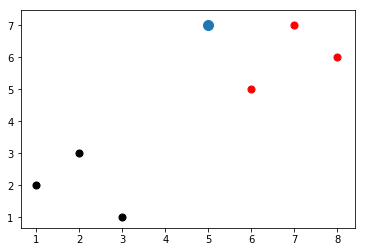

In [3]:
#usando un doble array para pintar el dataset
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1],s=100) #s=el tamaño del punto

In [4]:
#definir la funcion knn
#distancia euclidia a mano
#d = sqrt((feature[0]-predict[0]))**2+(feature[1]-predict[1]**2)
#distancia euclidia con numpy
#d = np.sqrt(np.sum(np.array(feature)-np.array(predict))**2)
#tercer modo de calcular distancia euclidiana
#mide la magnitud de un vector, que es lo mismo que calcular la distancia
def k_nearest_neighbors(data, predict, k = 3, verbose=False):
    if len(data) >=k:
        warnings.warn("K es un valor menor que el número total de elementos a votar")        
    distances = []
    for group in data:
        for feature in data[group]:
            d = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([d, group])
    if verbose:       
        print(distances)
    votes = [i[1] for i in sorted(distances)[:k]]
    if verbose:
        print(votes)
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [5]:
result = k_nearest_neighbors(dataset,new_point,verbose=True)
result #el resultado es una matriz de distancias

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']


'r'

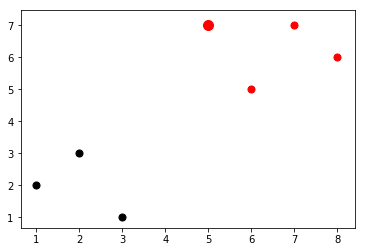

In [6]:
#usando un doble array para pintar el dataset
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1],s=100, color=result) #s=el tamaño del punto

In [7]:
#poniendo un punto donde claramente pertenece a los negros
new_point = [2,4]
result = k_nearest_neighbors(dataset,new_point,verbose=True)
result #el resultado es una matriz de distancias

[[2.23606797749979, 'k'], [1.0, 'k'], [3.1622776601683795, 'k'], [4.123105625617661, 'r'], [5.830951894845301, 'r'], [6.324555320336759, 'r']]
['k', 'k', 'k']


'k'

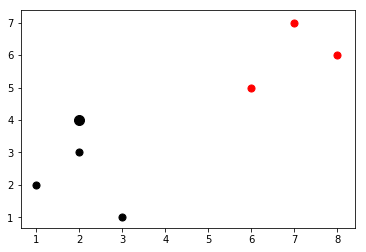

In [8]:
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1],s=100, color=result)

In [9]:
#ahora se prueba poniendo un punto en un lugar dudoso (4,4.5)
new_point = [4,4.5]
result = k_nearest_neighbors(dataset,new_point,verbose=True)
result #el resultado es una matriz de distancias

[[3.905124837953327, 'k'], [2.5, 'k'], [3.640054944640259, 'k'], [2.0615528128088303, 'r'], [3.905124837953327, 'r'], [4.272001872658765, 'r']]
['r', 'k', 'k']


'k'

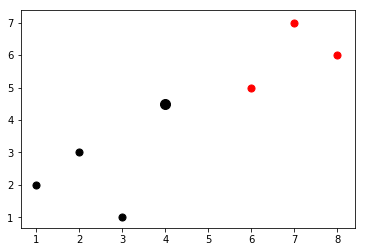

In [10]:
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1],s=100, color=result)

## aplicando algoritmo de knn con base de datos breast-cancer-wisconsin

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [13]:
df.columns = ["id","V1","V2","V3","V4","V5","V6","V7","V8","V9","clase"]

In [14]:
df.drop(["id"],1,inplace=True)

In [15]:
df.replace("?",-99999,inplace=True)

In [16]:
#conversion de los valores a flotantes y los crea como un array
#que es lo que espera como argumento el algoritmo
full_data = df.astype(float).values.tolist() 

In [17]:
#para dividir el conjunto en entrenamiento y prueba
import random 

In [18]:
#es una segunda manera de dividir los datos en conjunto de entrenamiento y de prueba
#esta función asemeja barajar los valores
random.shuffle(full_data)

In [19]:
#tamaño del conjunto de prueba 20%
test_size = 0.2

In [20]:
#diccionario que tendra como clave 2 y 4 
train_set = {
    2:[],
    4:[]
}
test_set = {
    2:[],
    4:[]
}

In [25]:
#de train_data (entrenamiento), quedarse con todos los elementos menos el ultimo 20%
train_data = full_data[:-int(test_size*len(full_data))]
#test_data (prueba), toma el 20% restante que se dejo de train_data
test_data  = full_data[-int(test_size*len(full_data)):]

In [26]:
#train_data y test_data siguen siendo arrays, por lo tanto se llenaran con los diccionarios
#train_set y test_set
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])


In [32]:
#entrenando
correct = 0
total = 0
for group in test_set:
    for data in  test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
    if group == vote:
        correct+=1
    total +=1
print("eficacia del knn implementado por nosotros =",correct/total*100)

eficacia del knn implementado por nosotros = 100.0


In [33]:
#testeando
correct = 0
total = 0
for group in test_set:
    for data in  test_set[group]:
        vote = k_nearest_neighbors(test_set, data, k=5)
    if group == vote:
        correct+=1
    total +=1
print("eficacia del knn implementado por nosotros =",correct/total*100)

eficacia del knn implementado por nosotros = 100.0


In [35]:
vote = k_nearest_neighbors(test_set, data, k=5)
vote

4